In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [2]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices[DATE_COLUMN] = pd.to_datetime(system_prices[DATE_COLUMN])
system_prices.set_index(DATE_COLUMN)
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


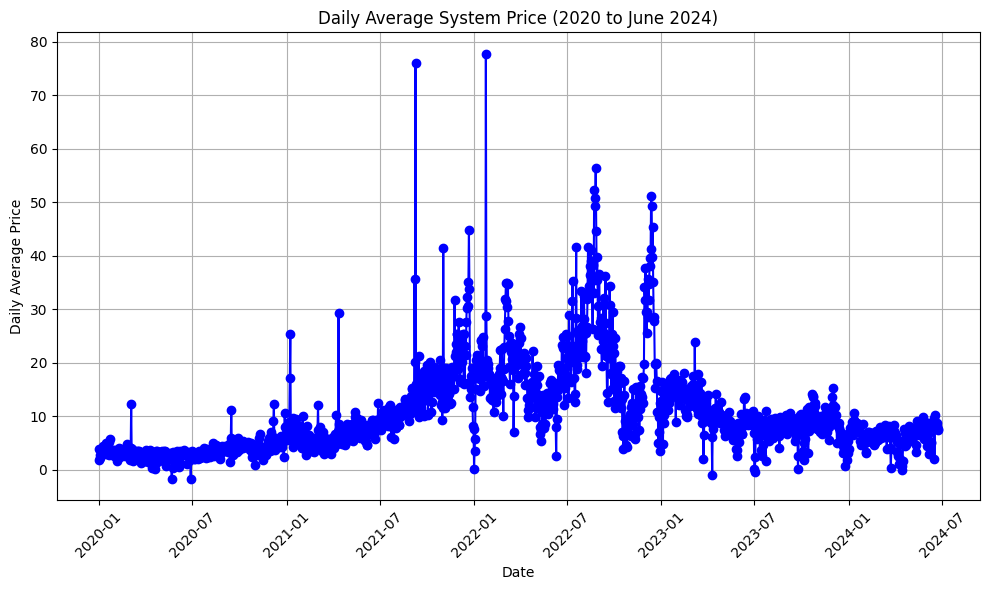

In [3]:
# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices[DATE_COLUMN], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Average System Price (2020 to June 2024)')
plt.xlabel(DATE_COLUMN)
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## 15 - Day Prediction

In [4]:
start = '2023-02-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


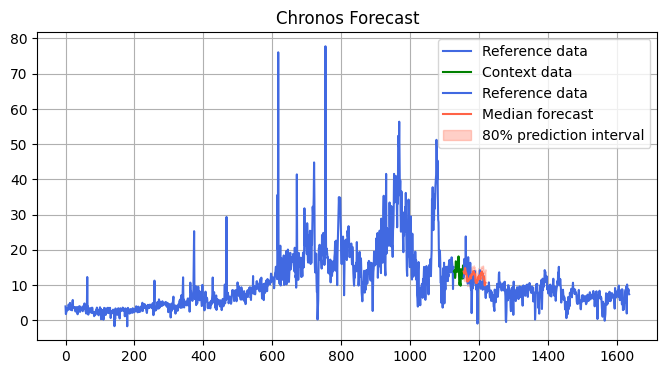

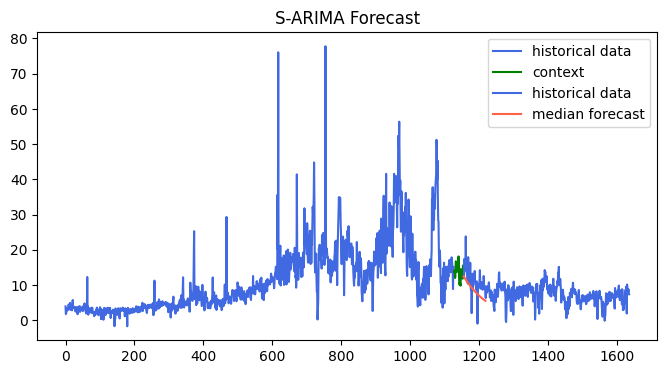

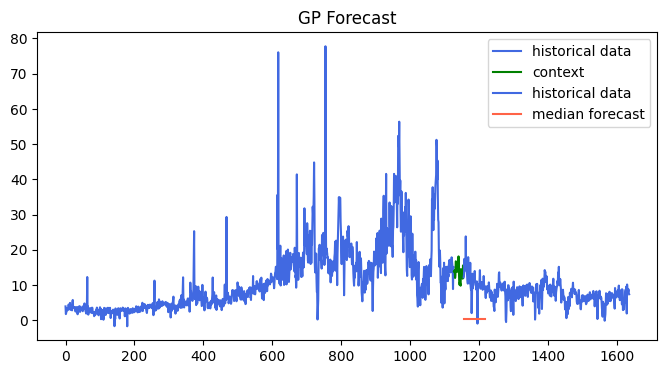

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


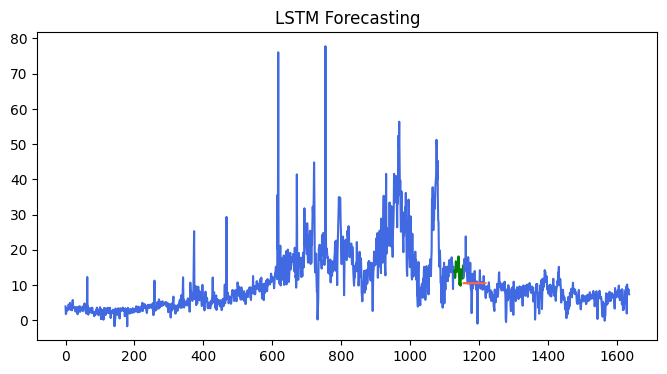


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.19866757234655952
- sarima MSE: 0.24492525727395698
- gp MSE: 1.9782676711846134
- lstm MSE: 0.19955086892359247
NMSE
- chronos_mini NMSE: 1.024208928580925
- sarima NMSE: 1.262685361138713
- gp NMSE: 10.198742492387249
- lstm NMSE: 1.0287626674226318



In [5]:
_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [6]:
context_window_length = utils.find_first_occurrence_index(system_prices,end,"Date") - utils.find_first_occurrence_index(system_prices,start,"Date")
print(f"context_window_length: {context_window_length}")
#utils.whole_window_comparison_of_data(system_prices,column,context_window_length,prediction_length)

context_window_length: 28


## One Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


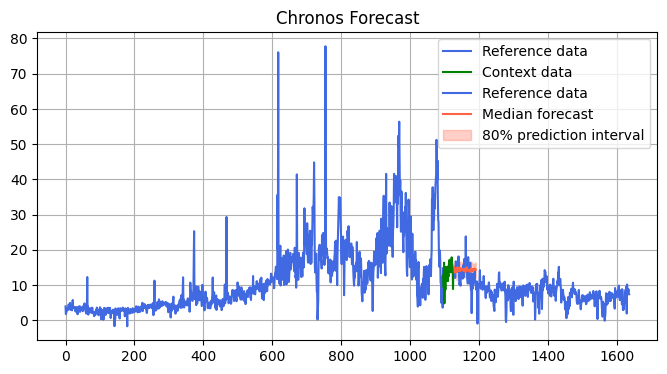

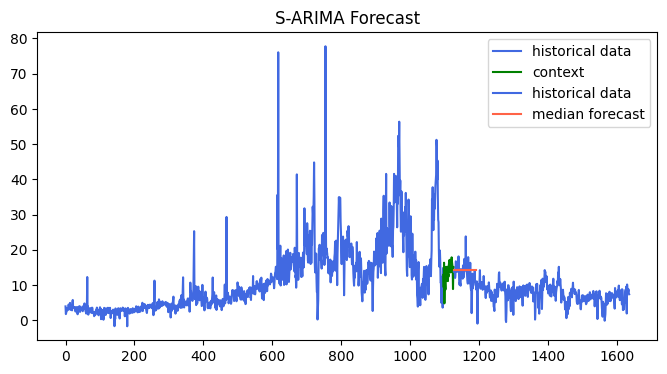

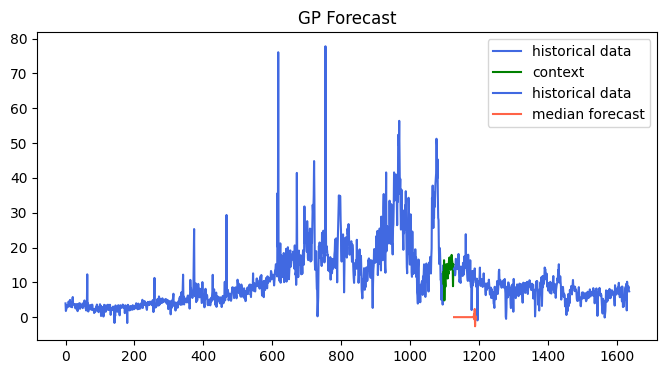

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


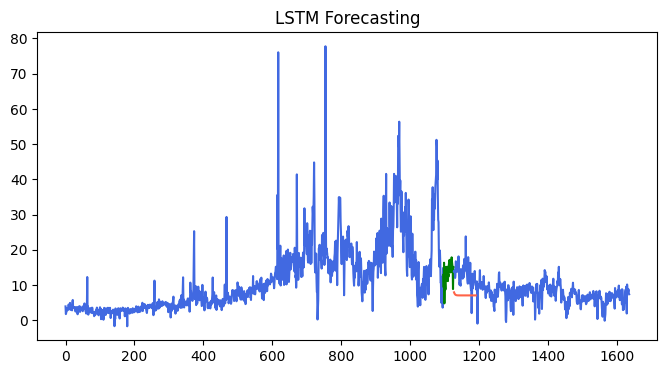


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.17671556187764537
- sarima MSE: 0.17897524818123925
- gp MSE: 2.7865203455006107
- lstm MSE: 0.6868475914108568
NMSE
- chronos_mini NMSE: 1.190428525178681
- sarima NMSE: 1.2056506991919478
- gp NMSE: 18.77114426159829
- lstm NMSE: 4.626887165895874



In [7]:
start = '2023-01-01'
end = '2023-02-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Month Prediction

/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


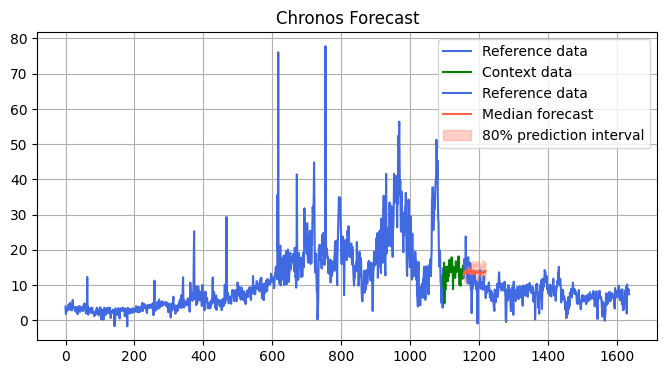

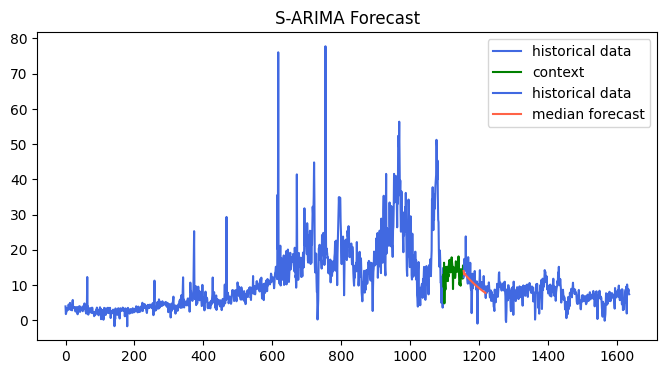

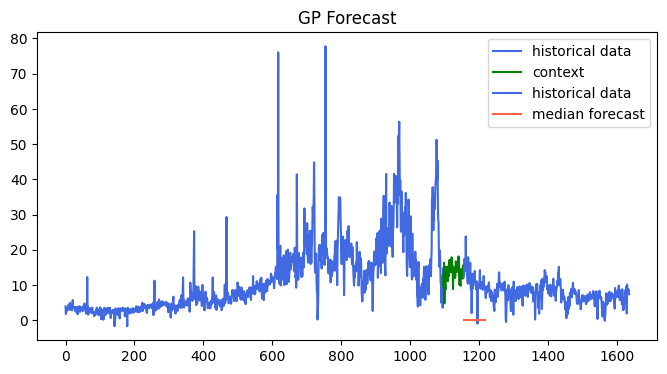

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


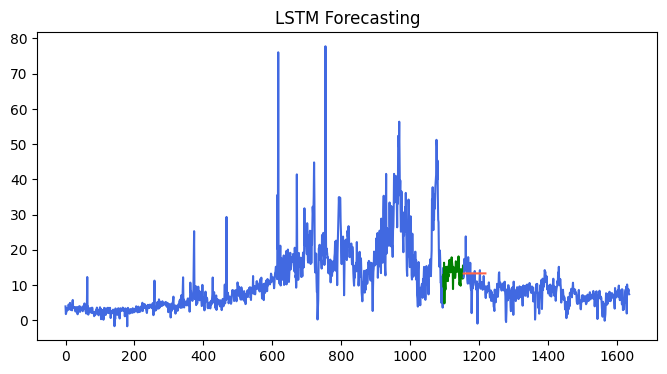


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.2872690706997109
- sarima MSE: 0.14960886469808093
- gp MSE: 2.1378503247070313
- lstm MSE: 0.26759240332569495
NMSE
- chronos_mini NMSE: 1.480984257473785
- sarima NMSE: 0.7712921299069957
- gp NMSE: 11.021453399123343
- lstm NMSE: 1.3795433520902491



In [8]:
start = '2023-01-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64
_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


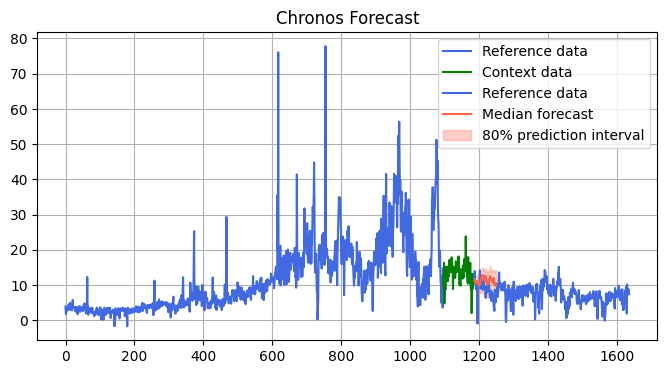

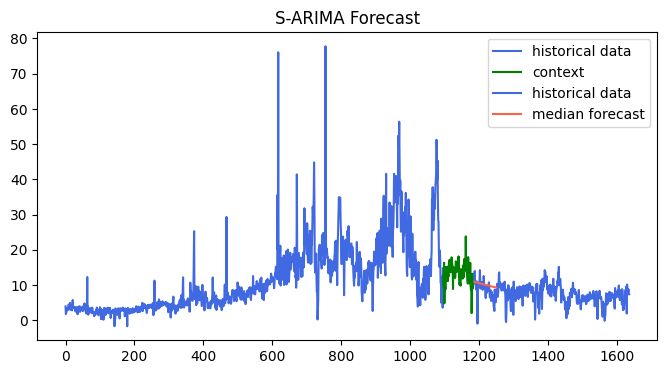

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


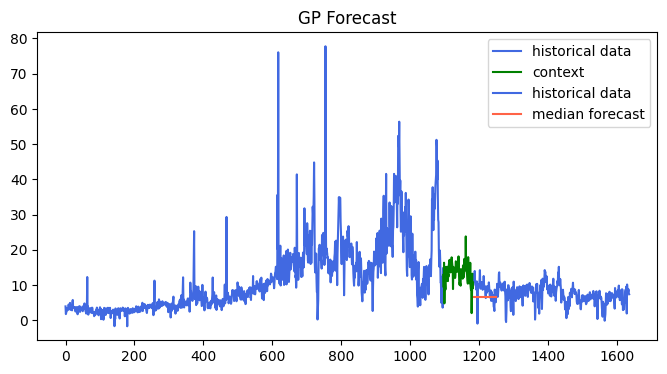

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


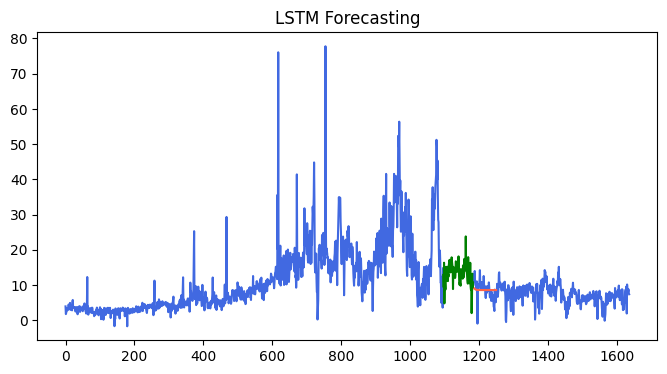


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.2160547660115537
- sarima MSE: 0.12055435634730258
- gp MSE: 0.16286928828981967
- lstm MSE: 0.09588682683500138
NMSE
- chronos_mini NMSE: 2.2122306136870042
- sarima NMSE: 1.2343816461358381
- gp NMSE: 1.6676532169852056
- lstm NMSE: 0.9818055749918108



In [9]:
start = '2023-01-01'
end = '2023-04-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Six Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


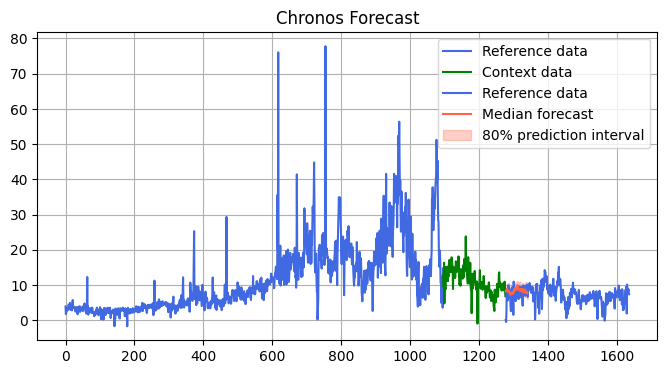

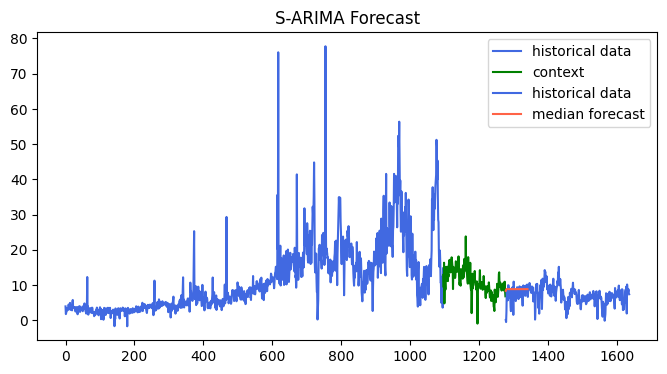

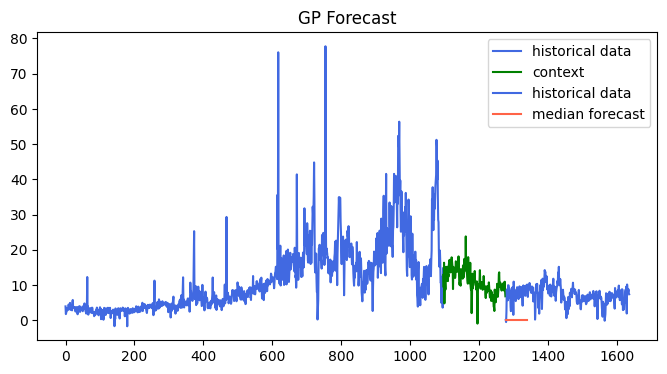

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


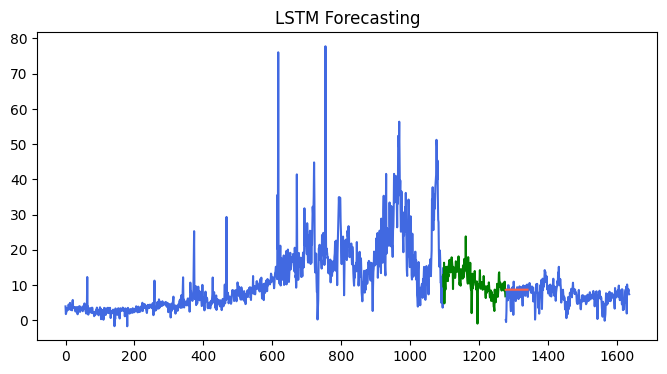


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.1051764327268893
- sarima MSE: 0.11722729251889463
- gp MSE: 0.9362812646484376
- lstm MSE: 0.1126971920547911
NMSE
- chronos_mini NMSE: 1.2241729308194962
- sarima NMSE: 1.3644356871042738
- gp NMSE: 10.897595118027173
- lstm NMSE: 1.3117087955538762



In [10]:
start = '2023-01-01'
end = '2023-07-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Having seen one anomaly, can you predict nect?

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


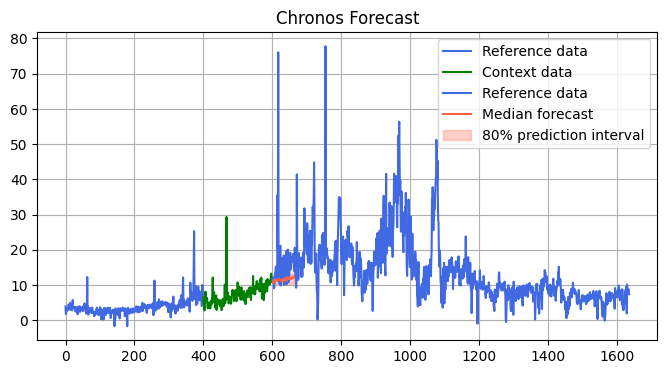

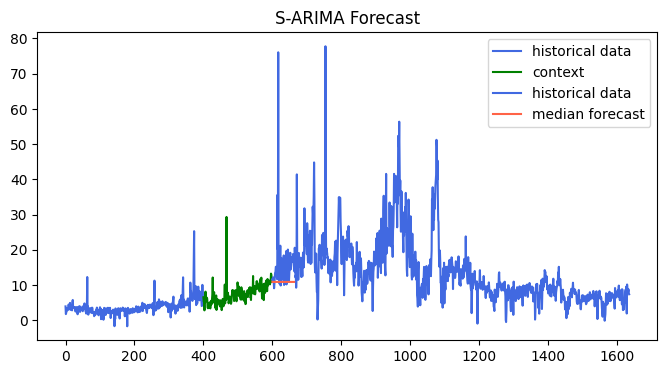

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


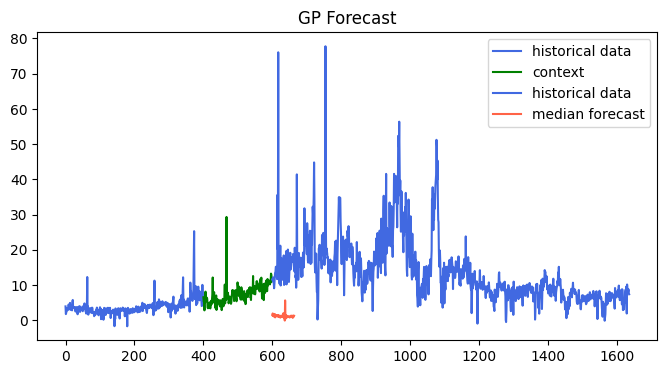

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


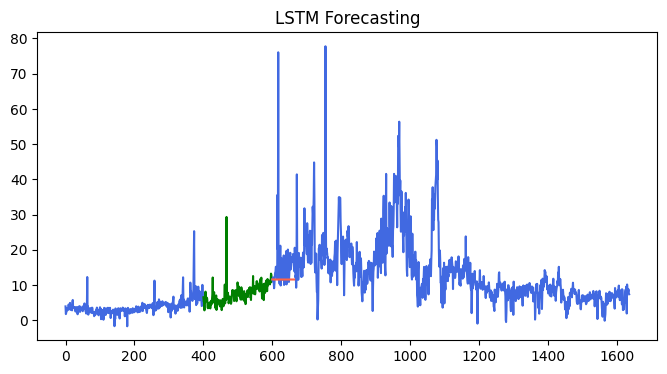


Results comparison for Daily average:

MSE
- chronos_mini MSE: 1.426531766864617
- sarima MSE: 1.5372415710630807
- gp MSE: 4.522397172358474
- lstm MSE: 1.4375912494702823
NMSE
- chronos_mini NMSE: 1.2455866114636793
- sarima NMSE: 1.3422536840592374
- gp NMSE: 3.9487640587154984
- lstm NMSE: 1.2552432793229653



In [11]:
_ = utils.compare_prediction_methods(system_prices,column,400,600,prediction_length)

## One Year Context Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


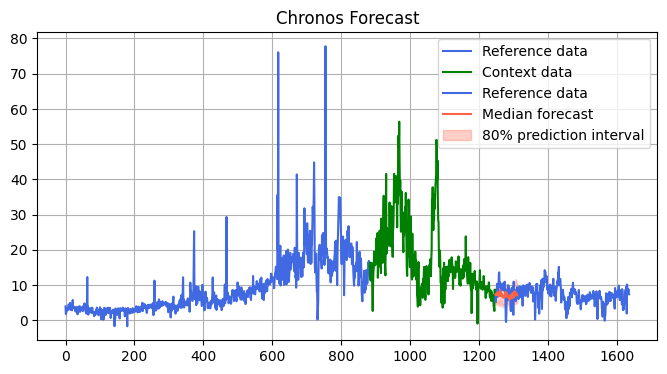

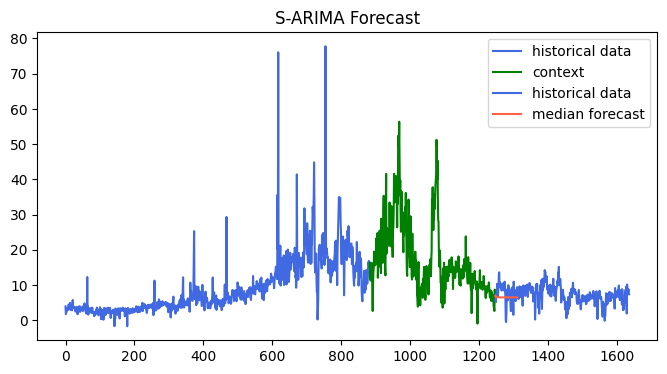

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


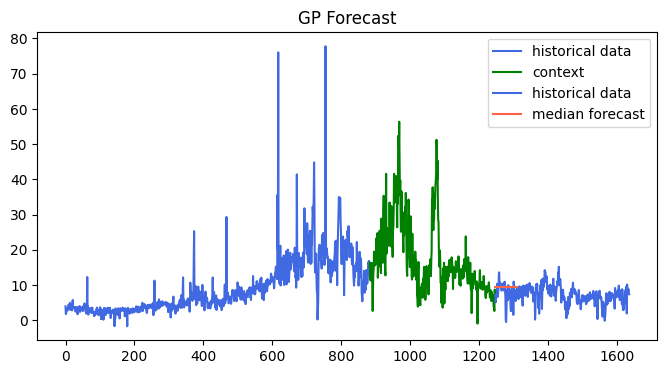

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


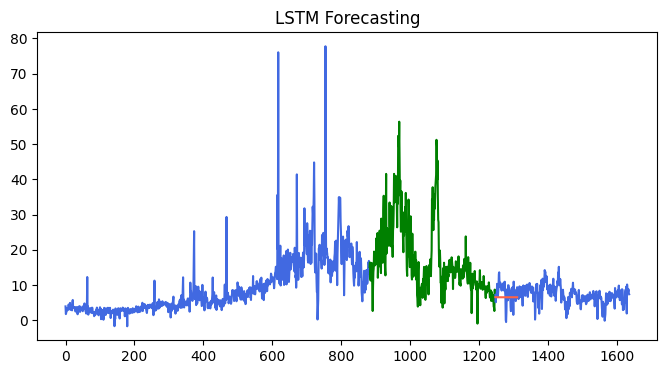


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.12744162160244749
- sarima MSE: 0.13940358212739123
- gp MSE: 0.14845232208397754
- lstm MSE: 0.13806676112934504
NMSE
- chronos_mini NMSE: 1.157998575084537
- sarima NMSE: 1.2666909557128476
- gp NMSE: 1.3489123512371826
- lstm NMSE: 1.2545439287728604



In [12]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Year Context Comparison

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


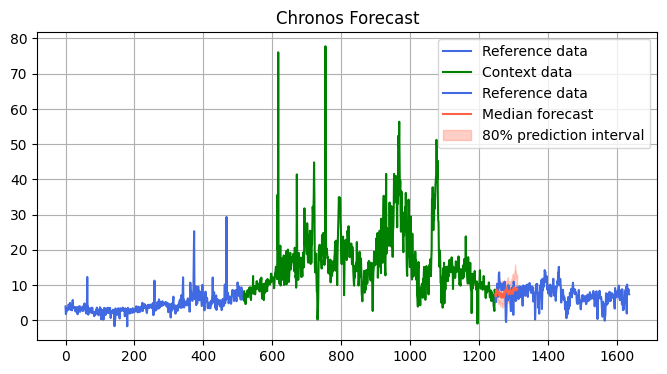

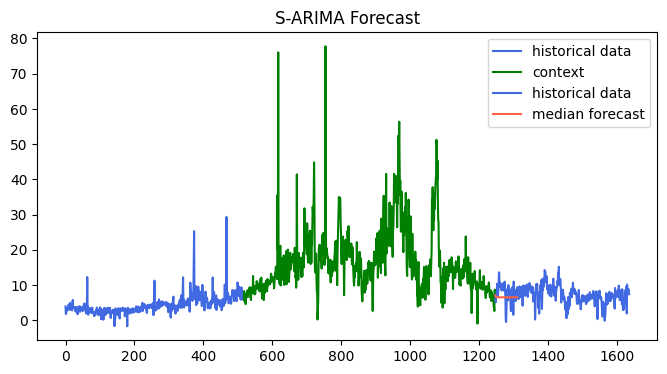

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


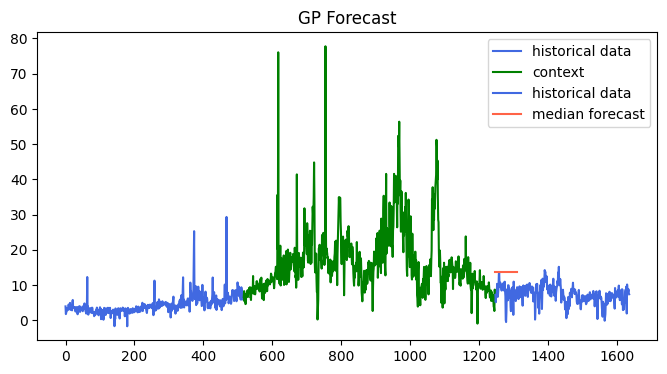

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


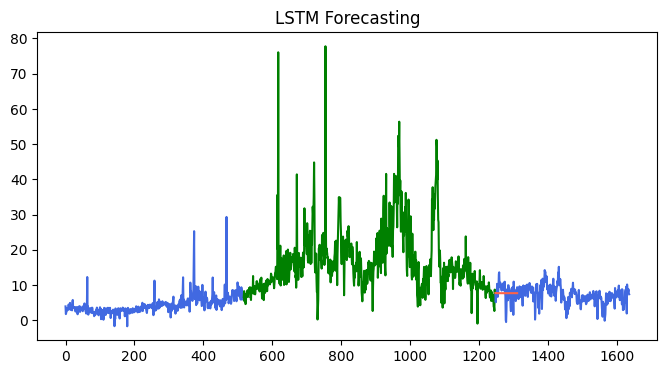


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.13757784568697645
- sarima MSE: 0.13858820467852861
- gp MSE: 0.6171321231487039
- lstm MSE: 0.11067650578038125
NMSE
- chronos_mini NMSE: 1.2501013975300785
- sarima NMSE: 1.2592820267297842
- gp NMSE: 5.6075723947895035
- lstm NMSE: 1.0056623132811398



In [13]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Year Context

In [14]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

# utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [15]:
values = lstm_predict(system_prices,column,0,200,64)


NameError: name 'lstm_predict' is not defined

In [ ]:
len(values)

## Next steps 

- Fine tune
- Move context window around and get histogram of error 
- See how to extract attention weights
